# Percorrendo a imagem

Uma imagem aberta com o OpenCV é uma matriz do Numpy.
Para manipular essa imagem, podemos usar a sintaze facilitada dessa API, bem como trabalhar com loops. Ou seja, teremos uma imagem **entrada** que vamos ler do disco e uma imagem **saida** que será uma transformação da imagem **entrada**.

In [1]:
%matplotlib inline
import cv2
import numpy as np

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.6.0 


Vamos ler uma imagem

In [2]:
entrada = cv2.imread("img/imagem.png")
entrada.shape

(512, 1024, 3)

Note que, apesar de vermos a imagem como cinza, ela tem as três componentes R, G e B. Vamos convertê-la para níveis de cinza:

In [3]:
entrada = cv2.cvtColor(entrada, cv2.COLOR_BGR2GRAY)

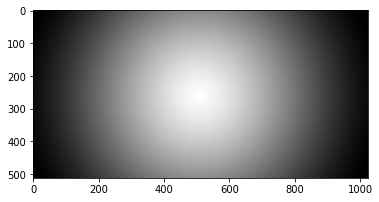

In [4]:
from matplotlib import pyplot as plt
plt.imshow(entrada, cmap='gray', vmin=0, vmax=255)
plt.show()

Nossa imagem **saida** precisa ser criada "vazia". Isso em geral é feita criando uma cópia Como criamos a imagem de saída? Uma maneira é criar uma cópia da imagem de entrada (em tons de cinza, neste caso)

In [6]:
saida = entrada.copy()

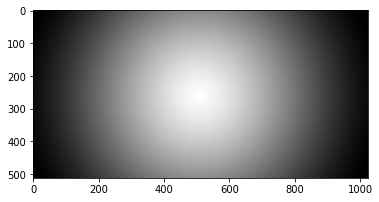

In [7]:
plt.imshow(saida, cmap='gray', vmin=0, vmax=255)
plt.show()

Podemos zerar a imagem para usar como saída

In [8]:
saida[:] = 0

Note que, depois de zerar, vemos a imagem toda como preto

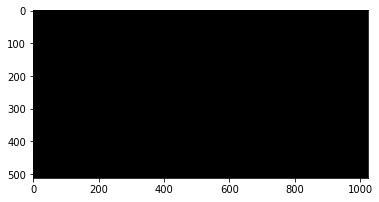

In [9]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Um outro jeito é criar uma imagem usando `np.zeros`, e a informação de `shape` que tínhamos visto antes 

In [10]:
saida = np.zeros(entrada.shape, dtype=np.uint8)

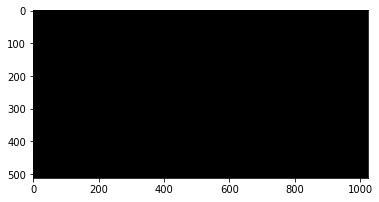

In [11]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

## Percorrendo a imagem pixel a pixel

Podemos percorrer a imagem usando dois `for` encaixados e acessando os pixels usando a notação do numpy. Veja abaixo um exemplo.

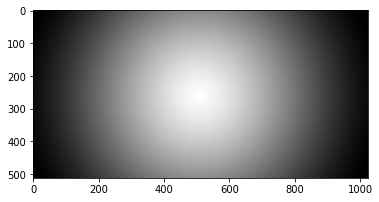

In [12]:
# Exemplo de como percorrer a imagem com for, copiando pixel a pixel
for i in range(entrada.shape[0]):
    for j in range(entrada.shape[1]):
        saida[i, j] = entrada[i, j]

# já mostra resultado
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Vamos usar o mesmo loop acima para criar uma imagem mais interessante. Vamos usar a função *cosseno* para criar um efeito de onda na imagem. A fórmula não é especialmente importante aqui. 

**O valor do pixel de saída na posição `i, j` depende somente do valor dessa mesma posição na imagem de entrada.**

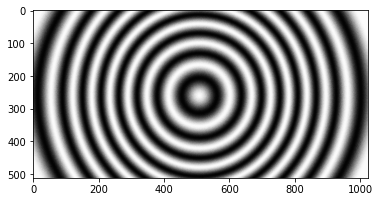

In [13]:
from math import cos, pi

def scale(valor):  
    return (valor/255.0)*16*pi

# percorre pixel a pixel
for i in range(entrada.shape[0]):
    for j in range(entrada.shape[1]):
        saida[i][j] = 127 + 124.0*cos(scale(entrada[i][j]))
        

# mostra a imagem
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Na imagem acima, vamos pintra de branco os pixels maiores do que 128.
Porém, vamos usar a indexação inteligente do Numpy.

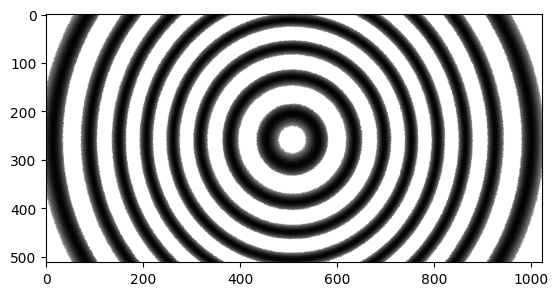

In [13]:
saida[saida > 128] = 255
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

##  Prática

Baixe uma imagem colorida da internet. Carregue a imagem com o OpenCV, converta para tons de cinza, e faça com que os pixels  maiores ou iguais a 128 fiquem brancos, enquanto os demais fiquem pretos. 

**Exercício 1**: Faça isso com os laços `for`

In [30]:
gato = cv2.imread('img/gato.jpg')
gato = cv2.cvtColor(gato, cv2.COLOR_BGR2GRAY)

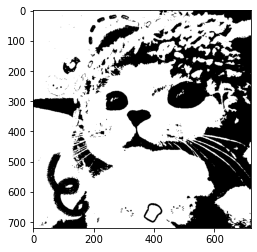

In [38]:
saida = np.zeros(gato.shape, dtype=np.uint8)

for i in range(saida.shape[0]):
    for j in range(saida.shape[1]):
        if gato[i][j] >= 128:
            saida[i][j] = 255

# já mostra resultado
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

**Exercício 2**: Faça isso usando a indexação inteligente do numpy

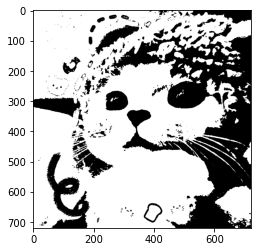

In [39]:
saida = np.zeros(gato.shape, dtype=np.uint8)

saida[gato > 128] = 255
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()